# Análise de dados das tabelas


### Sobre entradas e sáidas de pesos

> #### Dados sobre pesos de entrada e saida
    > |   Entradas   | Mediana     | Percentil 75   |Percentil 90   |
    > | ----------- | ----------- | ---------- | ---------- | 
    > | Input_weight| 0.04434     |0.0463983   |0.04796 | 
    > |Output_weight| 3.167       |3.3573129    |3.52248 | 

In [1]:
import pandas as pd
df = pd.read_csv('data/lot_info_15_ago_2023.csv')
df


,uuid,incoming_date,outgoing_date,input_total,input_weight,input_weight_total,output_total,output_age,output_age_total,output_weight,...,feed_per_capita,weight_gain_daily,weight_avg_by_age,feed_conversion_ratio,feed_conversion_ratio_adj,balance,deaths,mortality,density_stocking,europe_efficience_index
0,04ef96f7-f110-469d-a685-2f45708ae94b,2021-02-06,2021-03-24,19600.0,0.04742,929.432,18992,45.281250,8.599815e+05,2.798547,...,5.439031,42.0,1.401259,2.005738,2.100198,19600.0,513.0,2.617347,0.133333,298.575718
1,0975479f-edf6-4d21-acd7-65874c8aa369,2021-06-05,2021-07-21,21500.0,0.04527,973.305,20536,45.297222,9.302238e+05,2.612485,...,4.835767,42.0,1.299397,1.937912,2.084791,21500.0,958.0,4.455814,0.188596,284.266417
2,1c226a2d-32d9-4f3e-b8ca-b58244909f6f,2022-05-11,2022-06-25,20500.0,0.04583,939.515,19779,44.434028,8.788606e+05,2.874766,...,4.938628,42.0,1.434933,1.780373,1.861681,20498.0,751.0,3.663415,0.142361,350.611656
3,1fe609a8-ef0e-4506-a39a-9e21923f505f,2023-03-03,2023-04-20,20000.0,0.04611,922.200,19085,47.381944,9.042844e+05,3.497511,...,5.950045,42.0,1.731338,1.782607,1.716493,19998.0,795.0,3.975000,0.126984,395.141688
4,2a0d7cf8-e37d-4bfd-969a-c66f775e0ab9,2022-01-17,2022-03-02,20500.0,0.04491,920.655,19878,43.545139,8.655903e+05,2.545528,...,4.581816,42.0,1.275925,1.855455,2.019073,20491.0,593.0,2.892683,0.162698,305.496793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,e68a2882-a594-446a-9122-ce73dc900a56,2022-07-12,2022-08-26,34000.0,0.04200,1428.000,31482,44.416667,1.398326e+06,3.142431,...,5.020294,42.0,1.532536,1.725361,1.738907,34000.0,2194.0,6.452941,0.307971,379.684668
18043,40202c2a-a618-4415-bca5-06b2ceeb3827,2021-10-21,2021-12-06,32200.0,0.03800,1223.600,30660,46.000000,1.410360e+06,3.137965,...,5.287205,42.0,1.550010,1.769546,1.784142,32200.0,1325.0,4.114907,1.341667,367.066463
18044,46598bfa-38a9-4604-b812-114cea9e4bba,2021-08-14,2021-10-01,31400.0,0.04600,1444.400,30440,48.000000,1.461120e+06,3.435611,...,6.226815,42.0,1.714495,1.869593,1.814155,31400.0,940.0,2.993631,0.817708,371.134014
18045,47c980bb-ec67-4768-9779-1f19dee57c4f,2021-12-23,2022-02-08,31000.0,0.04100,1271.000,30058,47.000000,1.412726e+06,3.611019,...,5.941516,42.0,1.798470,1.696950,1.600240,31000.0,973.0,3.138710,1.291667,438.996551


array([[<Axes: title={'center': 'output_weight'}>]], dtype=object)

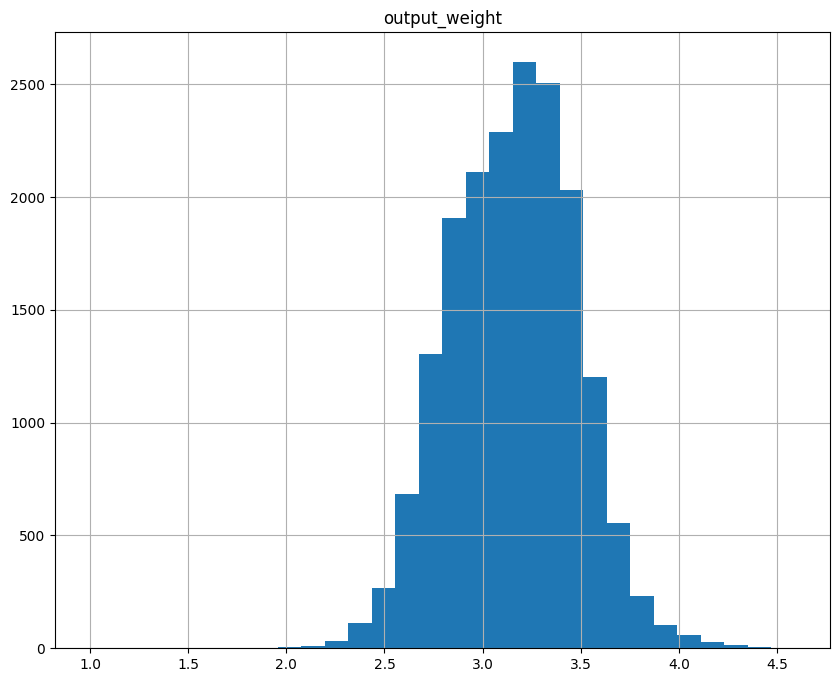

In [4]:
## histograma de input_weight e output_weight com pandas
df[['output_weight']].hist(bins=30, figsize=(10,8))

array([[<Axes: title={'center': 'input_weight'}>]], dtype=object)

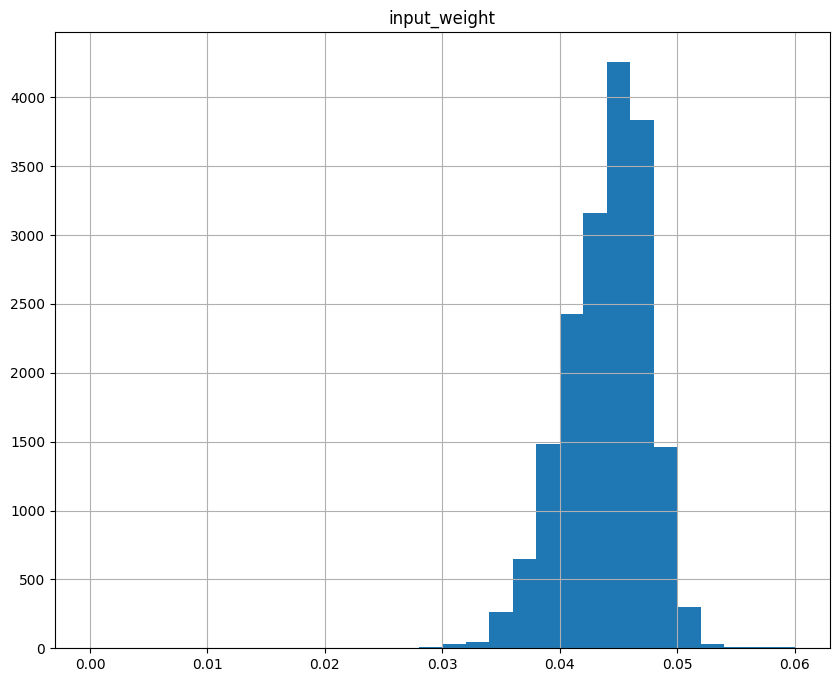

In [8]:
## histograma de input_weight indo de 0 a 0.6
df[['input_weight']].hist(bins=30, figsize=(10,8), range=(0,0.06))

<Axes: >

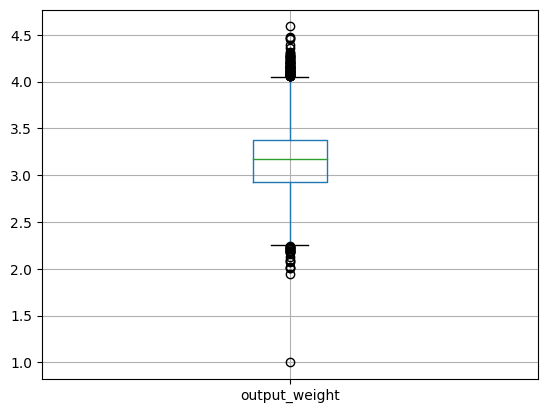

In [5]:
# boxplot de input_weight e output_weight com pandas
df[['output_weight']].boxplot()

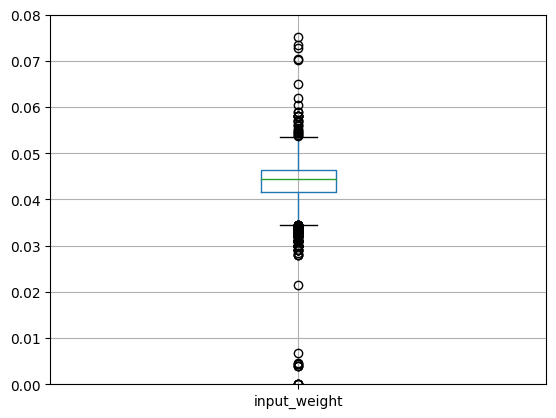

In [7]:
import matplotlib.pyplot as plt
data = df[['input_weight']]
ax = data.boxplot()
ax.set_ylim(0, 0.08)
plt.show()

### Valores  contidos nas colunas

> #### Valores isolados Input_weight
    > |             | >0.06    |    NaN    |      Max      |
    > | ---------   | ---------|---------- | --------      |
    > | Input_weight| 38       |   19      |  599391.0     | 


> #### Valores isolados Output_weight
    > |             | >4.5     |    NaN    |      Max      |
    > | ---------   | ---------|---------- | --------     |
    > | Input_weight| 1        |   0      |  4.58961474   | 


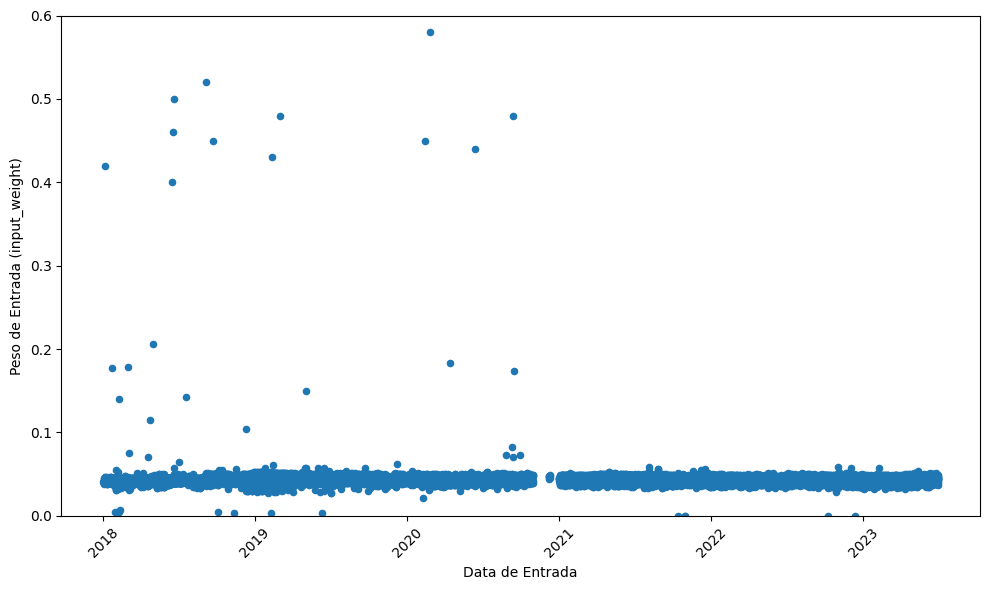

In [17]:
# Converta a coluna incoming_date para datetime
df['incoming_date'] = pd.to_datetime(df['incoming_date'])

# Crie o gráfico de dispersão
ax = df.plot.scatter(x='incoming_date', y='input_weight', figsize=(10, 6))

# Defina os limites do eixo y para variar entre 0 e 0.3
ax.set_ylim(0, 0.6)

# Rotacione os rótulos do eixo x para exibi-los na vertical
ax.tick_params(axis='x', rotation=45)

# Configure o título dos eixos
plt.xlabel('Data de Entrada')
plt.ylabel('Peso de Entrada (input_weight)')

# Mostra o gráfico
plt.tight_layout()
plt.show()

In [5]:
# contar quantas entradas tem pra o uuid 04ef96f7-f110-469d-a685-2f45708ae94b
df[df['uuid'] == '1c226a2d-32d9-4f3e-b8ca-b58244909f6f'].count()

uuid                         1
incoming_date                1
outgoing_date                1
input_total                  1
input_weight                 1
input_weight_total           1
output_total                 1
output_age                   1
output_age_total             1
output_weight                1
output_weight_total          1
feed_total                   1
feed_per_capita              1
weight_gain_daily            1
weight_avg_by_age            1
feed_conversion_ratio        1
feed_conversion_ratio_adj    1
balance                      1
deaths                       1
mortality                    1
density_stocking             1
europe_efficience_index      1
dtype: int64

In [4]:
#contar quantos uuids unicos tem
df['uuid'].count()

18047

In [4]:
#contar quantas nan existem em input_weight_total
df['input_weight_total'].isna().sum()


19

In [5]:
# input_weight
df['input_weight'].isna().sum()

19

In [6]:
#	output_weight
df['output_weight'].isna().sum()

0